# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing Libraries and Modules</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Loading Dataset</p>

In [2]:
data=pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Cleaning</p>

In [3]:
data.duplicated().sum()

0

In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Visualizing Normalised Data</p>

In [6]:
YE,salary=data.YearsExperience,data.Salary

In [7]:
arr=(YE-YE.mean())/YE.std()

In [8]:
arr1=(salary-salary.mean())/salary.std()

In [9]:
len(len(arr)*['YearsExperiance']+len(arr1)*['Salary'])

60

In [10]:
value1,value2=list(arr),list(arr1)
value1.extend(value2)


In [11]:
newdata=pd.DataFrame(dict(values=value1,key=len(arr)*['YearsExperiance']+len(arr1)*['Salary']))

Text(0.5, 1.0, 'Zscore in KDE Plot')

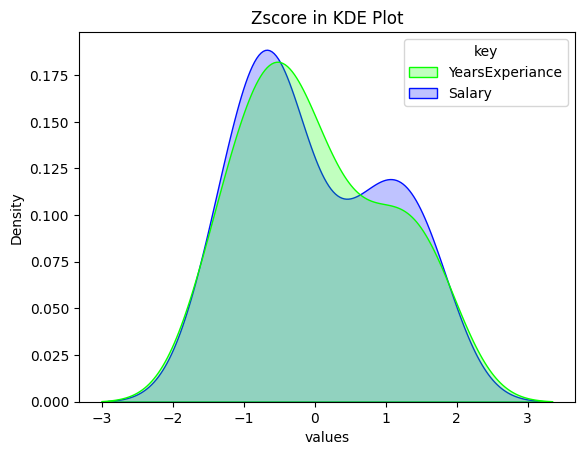

In [12]:
sb.kdeplot(data=newdata,x='values',hue='key',fill=True,palette='hsv')
plt.title('Zscore in KDE Plot')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Finding and Removing Outliers</p>

In [13]:
def outlier(arr,threshold):
    arr=np.array(arr)
    zscore=(arr-arr.mean())/arr.std()
    return np.where(abs(zscore)>threshold)

In [14]:
columns=data.columns

In [15]:
out1=outlier(data[columns[0]],1.5)
out2=outlier(data[columns[1]],1.5)


In [16]:
index=list(set((np.append(out1[0],out2[0]))))

In [17]:
data.drop(index,inplace=True)

Text(0.5, 1.0, 'Finding Relation')

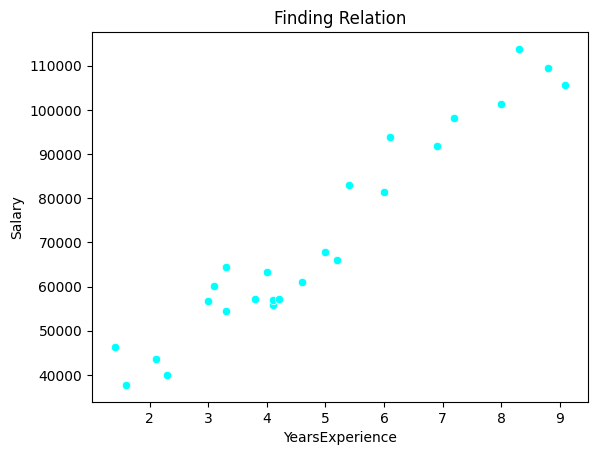

In [18]:
sb.scatterplot(data=data,x='YearsExperience',y='Salary',color='cyan')
plt.title('Finding Relation')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Machine Learning</p>

In [19]:
model=LinearRegression()

In [20]:
col=newdata.columns

In [21]:
def reshape(element):
    return np.array(element).reshape(-1,1)

In [22]:
x=data.YearsExperience
target=data.Salary
x,y=reshape(x),reshape(target)

In [23]:
xtra,xtest,ytra,ytest=train_test_split(x,target,test_size=0.2,random_state=2)

In [24]:
model.fit(xtra,ytra)

LinearRegression()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Result</p>

In [25]:
model.score(xtest,ytest)

0.9447685630105844

<div style="border-radius: 10px; border: 2px solid #FFD700; padding: 15px; background-color: #000; font-size: 120%; text-align: center; color: #FFD700; box-shadow: 0 0 15px rgba(255, 215, 0, 0.7);">
    <p style="margin: 0; font-weight: bold; font-size: 150%; color: #FFD700;">Thank You!</p>
    <p style="margin: 10px 0 20px; color: #FFD700;">Wishing you a day filled with brilliance and positivity!</p>
    <p style="margin: 0; color: #FFD700;">Take a moment to explore the fantastic things we have in store for you.</p>
</div>
